# Delhi House Price Prediction 
## by : Rambabu Kumar

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import matplotlib.pyplot 

In [2]:
df=pd.read_csv('/kaggle/input/delhi-house-price-prediction/MagicBricks.csv')

In [3]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [5]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

 # >> **Exploratory Data Analysis**

### So lets start the Data Analysis:

In [6]:
df['Area'].value_counts()

900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
530.0       1
972.0       1
324.0       1
4800.0      1
11050.0     1
Name: Area, Length: 315, dtype: int64

## To get a clear view about Area, we can see these plots below.
   ###     ----Which clearly says that Area values below 3000 sqft are more frequent.

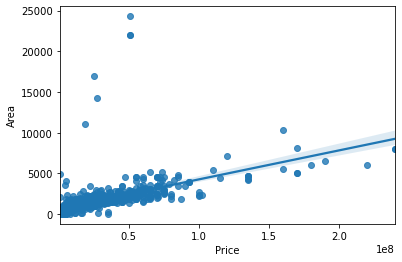

In [7]:
sns.regplot(y='Area',x='Price',data=df)

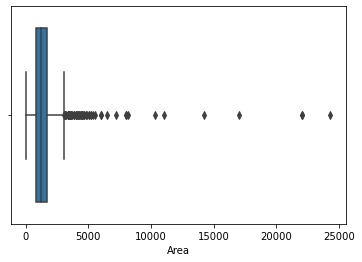

In [8]:
sns.boxplot(df["Area"])
plt.show()

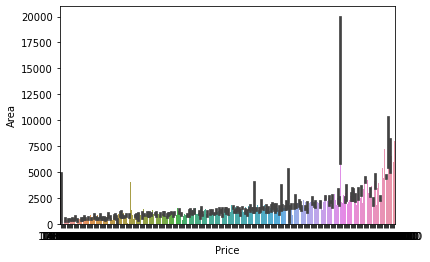

In [9]:
sns.barplot(df["Price"],df['Area'])
plt.show()

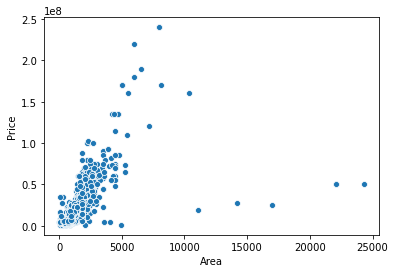

In [10]:
sns.scatterplot(df["Area"],df['Price'])
plt.show()

In [11]:
df['BHK'].value_counts()

3     541
2     367
4     220
1      96
5      27
6       6
10      1
7       1
Name: BHK, dtype: int64

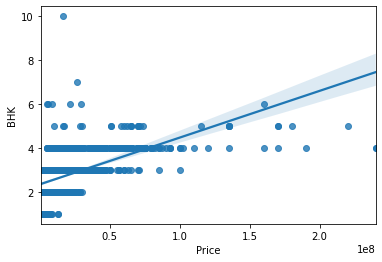

In [12]:
sns.regplot(y='BHK',x='Price',data=df)

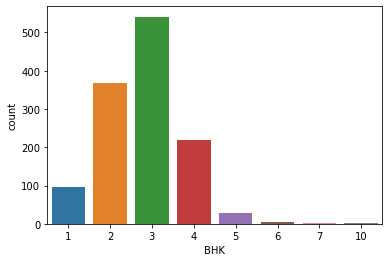

In [13]:
sns.countplot(df["BHK"])
plt.show()

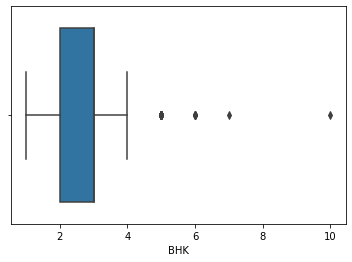

In [14]:
sns.boxplot(df["BHK"])
plt.show()

### **From these three plots above we can understand that BHK above 5 are not significant to predict Price. Lets do the same for Bathrooms**

In [15]:
df['Bathroom'].value_counts()

2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64

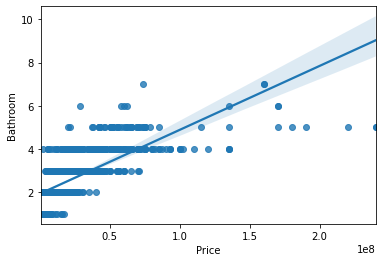

In [16]:
sns.regplot(y='Bathroom',x='Price',data=df)

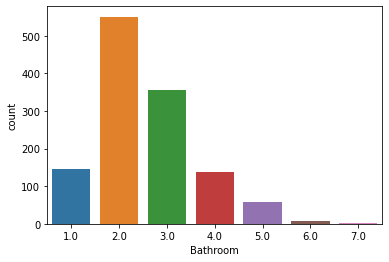

In [17]:
sns.countplot(df["Bathroom"])
plt.show()

### **Now this analysis implies that No. of Bathrooms above 5 really don't have any significant effect on Price Prediction**

In [18]:
df['Parking'].value_counts()

1.0      796
2.0      341
3.0       54
4.0       16
39.0       7
5.0        7
114.0      3
10.0       1
9.0        1
Name: Parking, dtype: int64

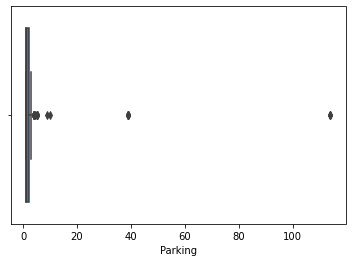

In [19]:
sns.boxplot(df["Parking"])
plt.show()

### **No. of Parking is mainly distributed about 1 and 2. This will be discussed later**

## ***For now let us analyse the Catagorical Data:-***

In [20]:
df['Transaction'].value_counts()

Resale          781
New_Property    478
Name: Transaction, dtype: int64

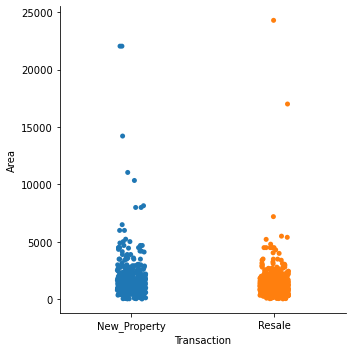

In [21]:
sns.catplot(x="Transaction", y="Area", data=df)


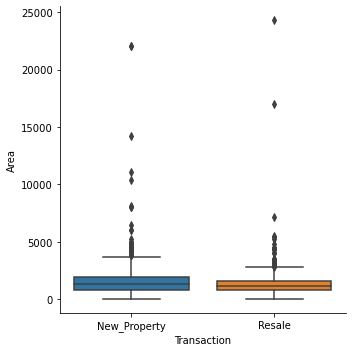

In [22]:
sns.catplot(x="Transaction", y="Area", kind="box", data=df)

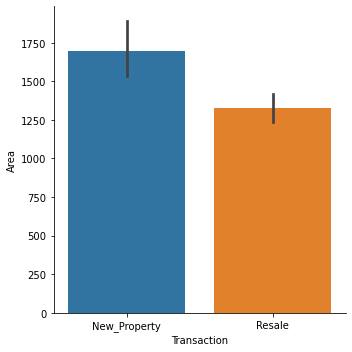

In [23]:
sns.catplot(x="Transaction", y="Area", kind="bar", data=df)

### ***Area is the biggest factor to predict price, as we all know. And seemingly Box Plot is a better way to understand the distribution of these Catagorical Data over Area. These plots as well say that MAX of Area is around 2500 sqft.*** 

### **Lets see what the other data are signifying--**

In [24]:
df['Status'].value_counts()

Ready_to_move    1184
Almost_ready       75
Name: Status, dtype: int64

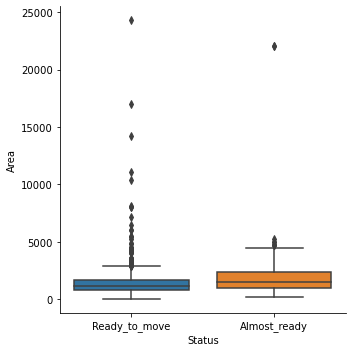

In [25]:
sns.catplot(x="Status", y="Area", kind="box", data=df)

In [26]:
df['Furnishing'].value_counts()

Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64

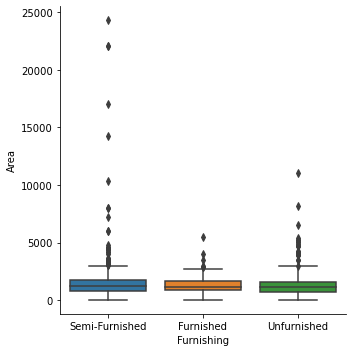

In [27]:
sns.catplot(x="Furnishing", y="Area", kind="box", data=df)

In [28]:
df['Type'].value_counts()

Builder_Floor    661
Apartment        593
Name: Type, dtype: int64

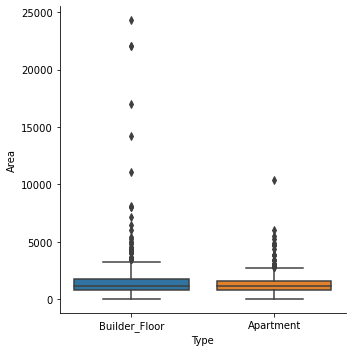

In [29]:
sns.catplot(x="Type", y="Area", kind="box", data=df)

### **These are also making us to take Area values below 3000 sqft. Lets see what the Area itself says**

In [30]:
df['Locality'].value_counts()

Lajpat Nagar 3                                       34
Lajpat Nagar 2                                       33
J R Designers Floors, Rohini Sector 24               31
Kailash Colony, Greater Kailash                      30
Yamuna Vihar, Shahdara                               29
                                                     ..
Kailash Apartments, Aashirwaad Chowk, Dwarka          1
Rohini ( 1 km from Shahbad Dairy, Rohini)             1
Sarve Satyam Apartment, Aashirwaad Chowk, Dwarka      1
Hauz Khas Apartment, Hauz Khas Enclave, Hauz Khas     1
Orchid Metropolis, Hauz Khas                          1
Name: Locality, Length: 365, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


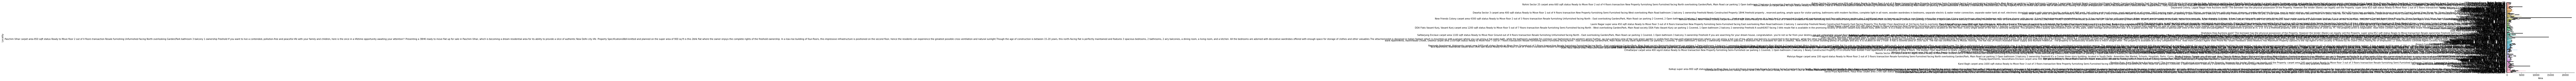

In [31]:
sns.catplot(x="Area", y="Locality", kind="bar", data=df)

### **Locality Column is a mess actually, 365 different localities are there. Though its evident. So we actually have nothing to do with this column.**

# >>  Filtering

> ## **We have done the Analysis. So now we will filter out the Dataframe. And we will workout the above plans.**

## 1. Filtering out Area Column-->

### Some more codes to get the correct Area range ;)

In [32]:
area_df=df['Area'].value_counts().head(40)
# Areas that occured atleast 10 times are taken:--

area_df
# among top 36 most occured(atleast 10 times) Area values, MAX is 2700.

900.0     67
1500.0    50
1800.0    48
1000.0    42
1600.0    38
1350.0    35
1100.0    32
1400.0    30
450.0     29
1200.0    28
1700.0    26
1300.0    25
800.0     25
850.0     21
750.0     21
950.0     19
1150.0    18
540.0     17
1450.0    16
700.0     15
810.0     15
500.0     14
1250.0    14
2000.0    13
600.0     12
720.0     11
1550.0    11
1050.0    11
350.0     10
2700.0    10
550.0     10
2250.0    10
650.0     10
4500.0    10
405.0     10
2200.0    10
675.0      9
990.0      8
1650.0     8
2100.0     8
Name: Area, dtype: int64

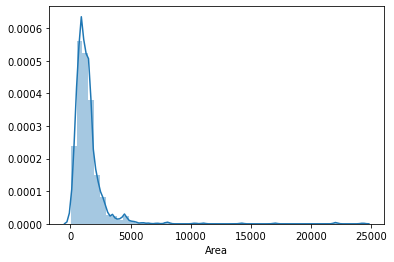

In [33]:
sns.distplot(df['Area'])

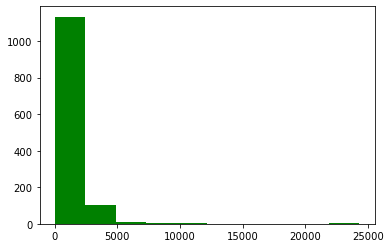

In [34]:
plt.hist(df["Area"],color='green')
plt.show()

 ## **~Yup. We did well. Lets keep AREA<=3000 sqft**

In [35]:
df=df[df['Area']<=3000]

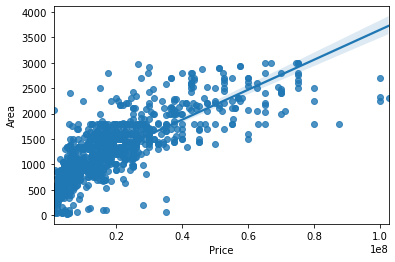

In [36]:
sns.regplot(y='Area',x='Price',data=df)

> ### And you can clearly see that with this above plot.

## 2. Filtering out BHK Column-->

In [37]:
df=df[df['BHK']<6]

## 3. Filtering out Bathroom Column-->

In [38]:
df=df[~(df['Bathroom']==6)]

### Here's our BRAND-NEW Dataframe....

In [39]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1252,1800.0,3,3.0,Semi-Furnished,"Nehru Enclave, Kalkaji",1.0,26000000,Ready_to_move,Resale,Builder_Floor,12916.0
1253,1200.0,3,3.0,Semi-Furnished,Chittaranjan Park,1.0,16500000,Ready_to_move,Resale,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0


In [40]:
correlation=df.corr()

In [41]:
correlation

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
Area,1.000000,0.736270,0.792406,-0.038374,0.796127,0.139027
BHK,0.736270,1.000000,0.751536,-0.088360,0.594771,0.134648
Bathroom,0.792406,0.751536,1.000000,-0.047850,0.742585,0.151435
Parking,-0.038374,-0.088360,-0.047850,1.000000,-0.020703,-0.019978
Price,0.796127,0.594771,0.742585,-0.020703,1.000000,0.267190
Per_Sqft,0.139027,0.134648,0.151435,-0.019978,0.267190,1.000000


### **Actully there are some Duplicate rows in our df. So I'm dropping them.

In [42]:
df.shape

(1181, 11)

In [43]:
new=df.drop_duplicates()

In [44]:
new.shape

(1104, 11)

# >> NULL value Removing

In [45]:
new.isnull().sum()

Area             0
BHK              0
Bathroom         1
Furnishing       5
Locality         0
Parking         30
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       222
dtype: int64

### There are still some NULL values in our Dataset. Lets find out ways to deal with them. 
#### *First concern is for Per_Sqft.*

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


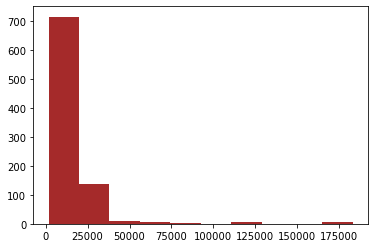

In [46]:
plt.hist(new["Per_Sqft"],color='brown')
plt.show()

### **There are 200 odd NULL values in Per_Sqft. I think the best way to fill them will be to fill them by the ratio of corresponding Price and Area.**

## "And it has a Reason"

In [47]:
compare=(new['Price']/new['Area'])-new['Per_Sqft']

In [48]:
compare

0               NaN
1         -0.333333
2       9648.789474
3        333.000000
4       2871.461538
           ...     
1252    1528.444444
1253     834.000000
1255   -1011.238095
1256    7084.000000
1257   -1299.838384
Length: 1104, dtype: float64

In [49]:
compare.median()

0.22222222222262644

### You can see Per_Sqft value is quite close to that ratio. So we will stick to this plan.

In [50]:
new['Per_Sqft']=new['Per_Sqft'].fillna(value=new['Price']/new['Area'] )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
new.head(50)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0000,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.000000
1,750.0000,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0000,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0000,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0000,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000
5,1300.0000,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.000000
6,1350.0000,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.000000
7,650.0000,2,2.0,Semi-Furnished,"Delhi Homes, Rohini Sector 24",1.0,4000000,Ready_to_move,New_Property,Apartment,6154.000000
8,985.0000,3,3.0,Unfurnished,Rohini Sector 21,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.000000
9,1300.0000,4,4.0,Semi-Furnished,Rohini Sector 22,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.000000


In [52]:
new.isnull().sum()

Area            0
BHK             0
Bathroom        1
Furnishing      5
Locality        0
Parking        30
Price           0
Status          0
Transaction     0
Type            5
Per_Sqft        0
dtype: int64

In [53]:
new[new['Bathroom'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,9000.0


In [54]:
new['Bathroom']=new['Bathroom'].fillna(value=new['Bathroom'].median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
# Not needed to go with Float value to Bathroom.
new = new.astype({"Bathroom":'int64'}) 

In [56]:
new

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0
1,750.0,2,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1252,1800.0,3,3,Semi-Furnished,"Nehru Enclave, Kalkaji",1.0,26000000,Ready_to_move,Resale,Builder_Floor,12916.0
1253,1200.0,3,3,Semi-Furnished,Chittaranjan Park,1.0,16500000,Ready_to_move,Resale,Builder_Floor,12916.0
1255,1050.0,3,2,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0


In [57]:
new.isnull().sum()

Area            0
BHK             0
Bathroom        0
Furnishing      5
Locality        0
Parking        30
Price           0
Status          0
Transaction     0
Type            5
Per_Sqft        0
dtype: int64

In [58]:
new['Furnishing'].value_counts()

Semi-Furnished    618
Unfurnished       315
Furnished         166
Name: Furnishing, dtype: int64

In [59]:
new['Type'].value_counts()

Builder_Floor    591
Apartment        508
Name: Type, dtype: int64

In [60]:
new[new['Furnishing'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
509,450.0,2,2,NaN,"Gandhi Nagar, Shahdara",NaN,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2,NaN,"Gandhi Nagar, Shahdara",NaN,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3,NaN,"Gandhi Nagar, Shahdara",NaN,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2,NaN,"Gandhi Nagar, Shahdara",NaN,10000000,Ready_to_move,Resale,NaN,4444.0
719,1500.0,3,2,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",1.0,13500000,Ready_to_move,Resale,NaN,9000.0


In [61]:
new[new['Type'].isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
509,450.0,2,2,NaN,"Gandhi Nagar, Shahdara",NaN,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2,NaN,"Gandhi Nagar, Shahdara",NaN,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3,NaN,"Gandhi Nagar, Shahdara",NaN,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2,NaN,"Gandhi Nagar, Shahdara",NaN,10000000,Ready_to_move,Resale,NaN,4444.0
719,1500.0,3,2,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",1.0,13500000,Ready_to_move,Resale,NaN,9000.0


### Type Column is well distributed between Builder_Floor and Apartment. What should we do?

### Ok. We are filling it with that value of a room at the same locality. Any other Suggestion is always welcomed.

In [62]:
new=new.sort_values(by='Locality',axis=0)
#This will arrange the localities sequentially...

In [63]:
new

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
222,2700.0,4,3,Semi-Furnished,"APL Builder Floor, Greater Kailash 1",1.0,60000000,Ready_to_move,New_Property,Builder_Floor,22222.000000
645,1850.0,3,2,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,15500000,Ready_to_move,Resale,Apartment,8378.378378
637,1550.0,3,2,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,13200000,Ready_to_move,Resale,Apartment,8516.129032
641,1470.0,3,2,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,14500000,Ready_to_move,Resale,Apartment,9863.945578
642,1500.0,3,2,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,14900000,Ready_to_move,Resale,Apartment,9933.333333
...,...,...,...,...,...,...,...,...,...,...,...
332,747.0,2,2,Furnished,"Yamuna Vihar, Shahdara",1.0,6500000,Ready_to_move,Resale,Builder_Floor,8701.000000
339,713.0,3,1,Unfurnished,"Yamuna Vihar, Shahdara",1.0,8000000,Ready_to_move,Resale,Apartment,11220.000000
355,700.0,2,1,Furnished,"Yamuna Vihar, Shahdara",2.0,16000000,Ready_to_move,New_Property,Builder_Floor,22857.000000
1010,540.0,2,1,Unfurnished,"Zakir Nagar, New Friends Colony",2.0,1500000,Ready_to_move,Resale,Builder_Floor,2778.000000


In [64]:
new.isnull().sum()

Area            0
BHK             0
Bathroom        0
Furnishing      5
Locality        0
Parking        30
Price           0
Status          0
Transaction     0
Type            5
Per_Sqft        0
dtype: int64

In [65]:
new['Type']=new['Type'].fillna(method='bfill')

In [66]:
new['Furnishing']=new['Furnishing'].fillna(method='bfill')

In [67]:
new.isnull().sum()

Area            0
BHK             0
Bathroom        0
Furnishing      0
Locality        0
Parking        30
Price           0
Status          0
Transaction     0
Type            0
Per_Sqft        0
dtype: int64

### Parking still have some NaNs. Lets first find if it has any significant role to play to predict price or not. 

## For that correlation of various columns with Price(i.e the Output Column) is to be examined.
### But some columns are NOT Numerical.

# >>LABEL ENCODING:
##### >----to convert Furnishing, Status, Transaction and Type into Numerical Data----<

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:

transaction_encoder=LabelEncoder()
type_encoder=LabelEncoder()

In [70]:
new['Furnishing']=furnishing_encoder.fit_transform(new['Furnishing'].astype('str'))
new['Status']=status_encoder.fit_transform(new['Status'])
new['Transaction']=transaction_encoder.fit_transform(new['Transaction'])
new['Type']=type_encoder.fit_transform(new['Type'].astype('str'))

NameError: name 'furnishing_encoder' is not defined

In [ ]:
new.head(30)

In [ ]:
new.corr()['Price']

In [ ]:
sns.heatmap(new.corr(),annot=True)

In [ ]:
sns.regplot(x="Parking", y="Price", data=new)

In [ ]:
sns.catplot(x="Furnishing", y="Price", kind="box", data=new)

In [ ]:
sns.regplot(x="Furnishing", y="Price", data=new)

> ## **Well we can understand from both Correlation Chart and the above plot that Parking Column is Good for Nothing for Price-Prediction. "A correlation of 0.02 is nothing". So is with Furnishing.**
### So these are dropped off along with Locality....

In [ ]:
final= new.drop(columns=['Furnishing','Parking','Locality'])

In [ ]:
final

In [ ]:
final['Bathroom'].value_counts()

### "And we are left with a pure numerical dataset."

# >>ONE HOT ENCODING:

### **As Label Encoding is generally followed by OHE

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first')

## Columns to be OHEd:~ BHK and Bathroom, as they are like catagorical data. Status, Transaction and Type are not reqd to do so as they have only two columns each. 

In [ ]:
final2=ohe.fit_transform(final[['BHK','Bathroom']])

In [ ]:
final2.toarray()

In [ ]:
final2=pd.DataFrame(final2.toarray())

In [ ]:
final2

# >>DATA Spliting:

In [ ]:
final1=final.drop(columns=['BHK','Bathroom'])

In [ ]:
final1=final1.reset_index()

In [ ]:
Index=pd.DataFrame()
Index=final.index

In [ ]:
Index

In [ ]:
final1=final1.drop(columns=['index'])

In [ ]:
final1

In [ ]:
final= pd.concat([final1, final2], axis=1,ignore_index=False)

In [ ]:
final

In [ ]:
final = final.rename(columns={0: "BHK_1",1: "BHK_2",2: "BHK_3",3: "BHK_4",4: "Bathroom_1",5: "Bathroom_2",6: "Bathroom_3",7: "Bathroom_4"})

In [ ]:
final = final[['Area','BHK_1','BHK_2','BHK_3','BHK_4','Bathroom_1','Bathroom_2','Bathroom_3','Bathroom_4','Status','Transaction','Type','Per_Sqft','Price']]

In [ ]:
final

In [ ]:
#final.drop(columns=['Per_Sqft'],inplace=True)

In [ ]:
y=final['Price'].values

In [ ]:
y

# >>SCALING: 
### --- a step of Data Pre-processing which is applied to independent variables or features of data. 
### *~It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm*.
> ## The formula used in the following object is often used in Statistic, where each value is replaced first substracting the mean of that column and then divided by the Standard Deviation of the same.
https://www.google.com/url?sa=i&url=https%3A%2F%2F365datascience.com%2Fstandardization%2F&psig=AOvVaw3pa_eeGRJHaJSfXrYJCCbF&ust=1606203348694000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCJCbpvOTmO0CFQAAAAAdAAAAABAD

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
ms = MinMaxScaler()

In [ ]:
X=final.drop(columns=['Price'])
X

In [ ]:
X[['Area','Per_Sqft']]=s.fit_transform(X[['Area','Per_Sqft']])
X

In [ ]:
X

In [ ]:
print(X.shape)
print(y.shape)

# >> MODEL Building:

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

## **(1). Linear Regression:--**

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

In [ ]:
plt.scatter(x=y_test, y=y_pred)
plt.show()

In [ ]:
print(lr.coef_)
print(lr.intercept_)

## **(2). Random Forest:--**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=40,random_state=0)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred1=rf.predict(X_test)

In [ ]:
y_pred1

In [ ]:
r2_score(y_test,y_pred1)

In [ ]:
plt.scatter(x=y_test, y=y_pred1)
plt.show()

In [ ]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 100,10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
estimators

In [ ]:
scores

## **(3). KNeighbours:--**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

In [ ]:
knr.fit(X_train, y_train)

In [ ]:
y_pred2=knr.predict(X_test)

In [ ]:
y_pred2

In [ ]:
r2_score(y_test,y_pred2)

## **(4). Gradient Boosting:--**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(loss='ls',n_estimators=500,subsample=0.5,min_samples_leaf=60,learning_rate=0.03,criterion='mse',max_features='auto', max_depth=20, random_state=20, n_iter_no_change=8)

In [ ]:
GB.fit(X_train, y_train)
y_pred3 = GB.predict(X_test)
r2_score(y_test,y_pred3)

In [ ]:
y_pred3

## **(5). XGBoost:--**

In [ ]:
from xgboost import XGBRegressor
XGB = XGBRegressor(eta=0.03,gamma=8,max_depth=1, max_leaves=3, subsample=0.01, reg_lambda=6, n_estimators=900, random_state=20)

In [ ]:
XGB.fit(X_train, y_train)
y_pred4 = XGB.predict(X_test)
r2_score(y_test,y_pred4)

# ---> There you go. We have successfully generated a model that is capable of predicting the Price of a house if the following data are given by the user.
### 1.Total Area, 
### 2.BHK,
### 3.Bathroom,
### 4.Status,
### 5.Transaction,
### 6.Type and 
### 7.Per_Sqft value. 


* ## Predictions are well above 82% correct(with the Gradient Boosting Model), which is quite good. XGBoost is unlikely loosing the race to GB, which is kind of weird, as it generally is better. But, we can do further upgradation and make the predictions more accurate possibly with some other Models. 
 ### **But for now the Boosting Algorithms are GOOD to GO.**

# >> Pickling

In [ ]:
import pickle

In [ ]:
pickle.dump(lr, open('model.pkl','wb'), protocol=2)

In [ ]:
pickle.dump(status_encoder, open('status_encoder.pkl','wb'), protocol=2)
pickle.dump(transaction_encoder, open('transaction_encoder.pkl','wb'), protocol=2)
pickle.dump(type_encoder, open('type_encoder.pkl','wb'), protocol=2)
pickle.dump(ohe, open('ohe.pkl','wb'), protocol=2)

**To CSV**

In [ ]:
final.to_csv('House_Price.csv')


# Notebook Ownership and Copyright

This Jupyter Notebook is owned and maintained by **Rambabu Kumar**.

---

<div style="text-align: center; font-size: 1.2em; margin-top: 20px;">
  This Project is made with ❤️ by Rambabu Kumar
</div>

---

**Copyright © 2025 Rambabu Kumar. All rights reserved.**

This notebook and its contents are protected by copyright law. Unauthorized reproduction, distribution, or modification of this work, in whole or in part, is strictly prohibited.
"""

